### Homework 3:  Master Regression on the Ames Housing Dataset

In [1]:
#replacing Ames Housing with Bikeshare data

This homework is meant to be a more open ended, exploratory way for students to complete their assignment for Homework project #3. 

Instead of doing the pre-assigned tasks in the other projects given, you can use this homework as a chance to develop your own model using the Ames Housing dataset.  It's meant to be a way to continue to refine the techniques and methods discussed in Unit 3 and make them your own.

Your homework assignment will be to synthesize the lessons taught in Unit 3, and present a coherent walk through of how you approached the modeling process.

**What You Will Turn In:**

A jupyter notebook with code and commentary that walks us through the following:

 - Exploratory Data Analysis on the original data
   - What values are highly correlated?  
   - Are there unusual values anywhere that might cause problems?  Are there values of the `SalePrice` column that are out of sync with what we might normally expect?
   
 - How were missing values imputed? 
 - What cross validation strategy did you use and why?
   - How did you interpret their results?
 - Your choice of analytical technique and how you decided to cross validate its best parameters
 - The use of pipelines to streamline your data processing and ensure correct alignment between training and test sets
 - Strategies you used to try and improve your score (it's okay if they didn't work -- just show us what you tried to do and why)
 - What features ended up having important causal impact on the target variable?
  
The end result should be a coherent walk through of how you approached the problem and developed a coherent solution to evaluate your data.

Some other notes: 

 - You can use the original dataset that was used in Unit 3's labs if you feel like sticking with this will help you retain the most important insights of the class.  
 - You also have the option of using the full dataset (provided in the data section) and/or portions of it.
  - For example:  setting up the pipeline framework we created in class and then using that to incrementally bring in new columns, experiment with different ways of encoding them and then updating your pipeline is a useful way to extend the classes main teachings.  You could also just try and work with the whole thing if you're feeling courageous.
 - Making kaggle submissions to demonstrate whether or not your changes resulted in actual improvements is great, but not required if you struggle with the Kaggle UI.
 - If you feel more comfortable, you can walk through this **same process** using the `bikeshare` dataset as well if you think that's more useful for you.

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/AgeoRuin/GA-DAT-Repo/GA-DAT_MyRepo/Lectures/Unit3/data/bikeshare.csv',index_col='datetime', parse_dates=True)
#imported the bike share data and indexed the datatime colum in order to organize from year beginning to year end

In [147]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [148]:
#first identifying the categorical columns within the data set to determine if the may be encoded ordinally or nominally 
# In doing so Seasons and Weather are the categorical columns identified 

df.select_dtypes(include=np.object)

,season,weather
datetime,,
2011-01-01 00:00:00,Spring,Clear Skies
2011-01-01 01:00:00,Spring,Clear Skies
2011-01-01 02:00:00,Spring,Clear Skies
2011-01-01 03:00:00,Spring,Clear Skies
2011-01-01 04:00:00,Spring,Clear Skies
...,...,...
2012-12-19 19:00:00,Winter,Clear Skies
2012-12-19 20:00:00,Winter,Clear Skies
2012-12-19 21:00:00,Winter,Clear Skies


In [149]:
#potentially could be modified but would be challening to rank
df.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [150]:
# Weather is the column that can ammended ordinally -- as riding a bike in clear skies vs heavy rain is a natural ranking
df.weather.unique()

array(['Clear Skies', 'Partly Cloudy', 'Light Storms/Rain',
       'Heavy Storms/Rain'], dtype=object)

In [151]:
# amending the weather category to rank the values accordingly 
weather_type = df.weather.unique().tolist()
df.weather.replace(['Heavy Storms/Rain', 'Light Storms/Rain', 'Partly Cloudy', 'Clear Skies'], [1, 2, 3, 4], inplace=True)

In [152]:
#one hot encoding the seasons in order to create 0 or 1 values in the respective columns

df = pd.get_dummies(df)

In [153]:
#verifying that additional columns were created via the one hot encoding method
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_Fall,season_Spring,season_Summer,season_Winter
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,4,9.84,14.395,81,0.0,16,0,1,0,0
2011-01-01 01:00:00,0,0,4,9.02,13.635,80,0.0,40,0,1,0,0
2011-01-01 02:00:00,0,0,4,9.02,13.635,80,0.0,32,0,1,0,0
2011-01-01 03:00:00,0,0,4,9.84,14.395,75,0.0,13,0,1,0,0
2011-01-01 04:00:00,0,0,4,9.84,14.395,75,0.0,1,0,1,0,0


In [154]:
#now verifying that there is no missing values in the dataset
df.isnull().sum()

holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
count            0
season_Fall      0
season_Spring    0
season_Summer    0
season_Winter    0
dtype: int64

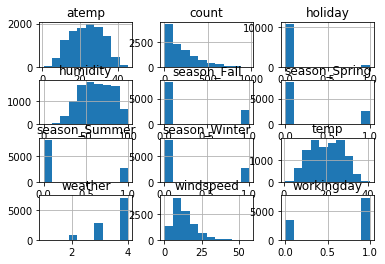

In [155]:
#from matplotlib import pyplot
#series = read_csv('daily-minimum-temperatures-in-me.csv', header=0, index_col=0)
#series.hist()
#pyplot.show()

from matplotlib import pyplot
df.hist()
pyplot.show()

In [156]:
#examining the columns with the highest correlations to bike count
np.abs(df.corr()['count']).sort_values(ascending=False)[1:12]

temp             0.394454
atemp            0.389784
humidity         0.317371
season_Spring    0.237704
season_Fall      0.136942
weather          0.128655
windspeed        0.101369
season_Summer    0.075681
season_Winter    0.023704
workingday       0.011594
holiday          0.005393
Name: count, dtype: float64

In [157]:
#going to examine the correlation in order of magnitude 

X = df[['temp', 'atemp', 'humidity', 'season_Spring', 'season_Fall', 'weather', 'windspeed', 'season_Summer', 'season_Winter', 'workingday', 'holiday']]
y = df['count']


In [158]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
lreg.coef_

array([  7.96221536,   2.90896113,  -2.8193085 ,  -6.16163525,
       -43.93235134,  -2.65169394,   0.5413689 ,  -8.95286505,
        59.04685163,  -2.86154948,  -8.63047234])

In [160]:
lreg.intercept_

140.8879022454985

In [161]:
coeff_dict = {'Column': X.columns, 'Weight': lreg.coef_}
coeffs     = pd.DataFrame(coeff_dict)
coeffs.sort_values(by='Weight', ascending=False)

,Column,Weight
8,season_Winter,59.046852
0,temp,7.962215
1,atemp,2.908961
6,windspeed,0.541369
5,weather,-2.651694
2,humidity,-2.819308
9,workingday,-2.861549
3,season_Spring,-6.161635
10,holiday,-8.630472
7,season_Summer,-8.952865


In [162]:
lreg.score(X, y)

0.2752503232099429

In [163]:
df['PREDICTION'] = lreg.predict(X)
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_Fall,season_Spring,season_Summer,season_Winter,PREDICTION
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,4,9.84,14.395,81,0.0,16,0,1,0,0,15.978198
2011-01-01 01:00:00,0,0,4,9.02,13.635,80,0.0,40,0,1,0,0,10.057679
2011-01-01 02:00:00,0,0,4,9.02,13.635,80,0.0,32,0,1,0,0,10.057679
2011-01-01 03:00:00,0,0,4,9.84,14.395,75,0.0,13,0,1,0,0,32.894049
2011-01-01 04:00:00,0,0,4,9.84,14.395,75,0.0,1,0,1,0,0,32.894049


In [164]:
cols_times_coefs = X[:1] * lreg.coef_
sum_of_cols = np.sum(cols_times_coefs, axis=1)
prediction = sum_of_cols + lreg.intercept_

print(prediction, df['PREDICTION'][:1])

datetime
2011-01-01    15.978198
dtype: float64 datetime
2011-01-01    15.978198
Name: PREDICTION, dtype: float64


In [165]:
#This model is not very predictive based on score and the predictions
#The next step is to standardize the data in order to get a more accurate predictions

In [166]:
X = X - X.mean()
X = X / X.std()
X.describe()

,temp,atemp,humidity,season_Spring,season_Fall,weather,windspeed,season_Summer,season_Winter,workingday,holiday
count,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04
mean,1.149780e-14,5.357382e-15,2.431354e-16,-6.241644e-15,2.161280e-14,-1.377692e-15,-4.893952e-14,2.276147e-14,-5.049424e-15,7.765238e-17,1.419038e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.491258e+00,-2.701612e+00,-3.215711e+00,-5.723031e-01,-5.789501e-01,-4.072918e+00,-1.567682e+00,-5.789501e-01,-5.790915e-01,-1.460605e+00,-1.714826e-01
25%,-8.073910e-01,-8.248275e-01,-7.735222e-01,-5.723031e-01,-5.789501e-01,-9.175406e-01,-7.101315e-01,-5.789501e-01,-5.790915e-01,-1.460605e+00,-1.714826e-01
50%,3.454240e-02,6.901988e-02,5.899721e-03,-5.723031e-01,-5.789501e-01,6.601481e-01,2.432527e-02,-5.789501e-01,-5.790915e-01,6.845848e-01,-1.714826e-01
75%,7.712342e-01,8.737776e-01,7.853216e-01,-5.723031e-01,1.727106e+00,6.601481e-01,5.142367e-01,1.727106e+00,1.726684e+00,6.845848e-01,-1.714826e-01
max,2.665584e+00,2.572383e+00,1.980435e+00,1.747165e+00,1.727106e+00,6.601481e-01,5.413351e+00,1.727106e+00,1.726684e+00,6.845848e-01,5.830960e+00


In [167]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
lreg.coef_

array([ 6.19491809e+01,  2.46933615e+01, -5.42748699e+01, -6.78217732e+13,
       -6.82162351e+13, -1.70599522e+00,  4.44046927e+00, -6.82162351e+13,
       -6.82245296e+13, -1.36708456e+00, -1.46961185e+00])

In [169]:
coeff_dict = {'Column': X.columns, 'Coefficient': lreg.coef_}
coeffs = pd.DataFrame(coeff_dict).sort_values(by='Coefficient', ascending=False)
coeffs

,Column,Coefficient
0,temp,6.194918e+01
1,atemp,2.469336e+01
6,windspeed,4.440469e+00
9,workingday,-1.367085e+00
10,holiday,-1.469612e+00
5,weather,-1.705995e+00
2,humidity,-5.427487e+01
3,season_Spring,-6.782177e+13
7,season_Summer,-6.821624e+13
4,season_Fall,-6.821624e+13


In [170]:
lreg.score(X, y)

0.2752514026100654

In [171]:
df['PREDICTION2'] = lreg.predict(X)

In [172]:
df[['PREDICTION', 'PREDICTION2']].head(10)

,PREDICTION,PREDICTION2
datetime,,
2011-01-01 00:00:00,15.978198,16.069392
2011-01-01 01:00:00,10.057679,10.147517
2011-01-01 02:00:00,10.057679,10.147517
2011-01-01 03:00:00,32.894049,32.991267
2011-01-01 04:00:00,32.894049,32.991267
2011-01-01 05:00:00,34.388612,34.522517
2011-01-01 06:00:00,10.057679,10.147517
2011-01-01 07:00:00,-15.583454,-15.493108
2011-01-01 08:00:00,32.894049,32.991267


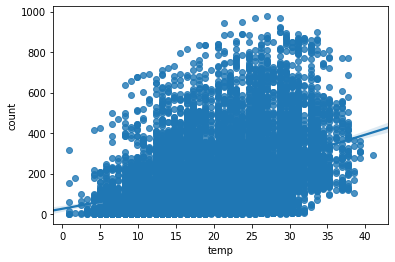

In [173]:
sns.regplot(x='temp', y='count', order=2, data=df);

In [174]:
#using the basis expansion with both versions
#version 1 with squaring the values
X['temp'] = X['temp']**2
lreg.fit(X, y)
lreg.score(X, y)

0.2727627480870677

In [175]:
#using version 2 by using the log of the values
#slightly higher returns
y = np.log(y)
lreg.fit(X, y)
lreg.score(X, y)

0.27358658187741847

In [176]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()
ridge.fit(X, y)
lasso.fit(X, y)
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
ridge.coef_

array([-0.06083306,  0.65980931, -0.50310369, -0.02106097, -0.12230764,
       -0.06277664,  0.06787827, -0.06135353,  0.20457549, -0.05400353,
       -0.01154326])

In [178]:
lasso.coef_

array([-0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.])

In [179]:
lreg.coef_

array([-5.21283129e-02,  6.60643130e-01, -5.01517595e-01, -9.50776651e+12,
       -9.56306515e+12, -6.40819556e-02,  6.64633547e-02, -9.56306515e+12,
       -9.56422795e+12, -5.32014029e-02, -9.99161091e-03])

In [180]:
ridgedf = pd.DataFrame(index=X.columns)
ridge.alpha = 10

In [181]:
ridge.fit(X, y)
ridgedf['alpha10']   = ridge.coef_

In [182]:
#changing the alpha to fine tune 
ridge.alpha = 100
ridge.fit(X, y)
ridgedf['alpha100']  = ridge.coef_

In [183]:
#changing the alpha again
ridge.alpha = 1000
ridge.fit(X, y)
ridgedf['alpha1000'] = ridge.coef_

In [184]:
ridgedf

,alpha10,alpha100,alpha1000
temp,-0.060858,-0.061056,-0.059977
atemp,0.658357,0.644312,0.538838
humidity,-0.502710,-0.498749,-0.459423
season_Spring,-0.021622,-0.026996,-0.063699
season_Fall,-0.121589,-0.114683,-0.065483
weather,-0.062529,-0.060086,-0.038777
windspeed,0.067958,0.068735,0.074828
season_Summer,-0.061090,-0.058540,-0.039086
season_Winter,0.204152,0.200037,0.167880
workingday,-0.053908,-0.052974,-0.045314


In [185]:
np.abs(ridgedf).sum()

alpha10      1.826293
alpha100     1.797463
alpha1000    1.562712
dtype: float64

In [186]:
#now using the lasso approach to see if there is a difference in scoring

In [187]:
lassodf = pd.DataFrame(index=X.columns)
lasso.alpha = .001

lasso.fit(X, y)
lassodf['lasso001']   = lasso.coef_

In [188]:
#changing the alpha again 
lasso.alpha = .01
lasso.fit(X, y)
lassodf['lasso01']  = lasso.coef_

In [189]:
lasso.alpha = .1
lasso.fit(X, y)
lassodf['lasso1'] = lasso.coef_

In [190]:
lassodf

,lasso001,lasso01,lasso1
temp,-0.060034,-0.053802,-0.000000
atemp,0.654891,0.611794,0.463421
humidity,-0.502151,-0.492839,-0.383873
season_Spring,0.000000,0.000000,-0.000000
season_Fall,-0.095653,-0.049312,-0.000000
weather,-0.061389,-0.048471,-0.000000
windspeed,0.067283,0.061927,0.000000
season_Summer,-0.035635,-0.000000,0.000000
season_Winter,0.226983,0.235111,0.121341
workingday,-0.052497,-0.039313,-0.000000


In [191]:
np.abs(lassodf).sum()

lasso001    1.766729
lasso01     1.592568
lasso1      0.968635
dtype: float64

In [218]:
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_Fall,season_Spring,season_Summer,season_Winter,PREDICTION,PREDICTION2
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,4,9.84,14.395,81,0.0,16,0,1,0,0,15.978198,16.069392
2011-01-01 01:00:00,0,0,4,9.02,13.635,80,0.0,40,0,1,0,0,10.057679,10.147517
2011-01-01 02:00:00,0,0,4,9.02,13.635,80,0.0,32,0,1,0,0,10.057679,10.147517
2011-01-01 03:00:00,0,0,4,9.84,14.395,75,0.0,13,0,1,0,0,32.894049,32.991267
2011-01-01 04:00:00,0,0,4,9.84,14.395,75,0.0,1,0,1,0,0,32.894049,32.991267


In [192]:
#next step is creating a training and test sets using both the train_test_split method and the datatime methods

In [193]:
#datetime approach
#first step of identifying the number of rows for the test set which is typically 20% 
test_amt = int(len(df)*.2)

In [194]:
#value to show the result of the previous action
# 2177 is the amount of rows the model will be tested
test_amt

2177

In [195]:
# identifying the appropriate index position to begin
test_index = len(df) - test_amt

In [196]:
# this step is sorting the dataset by its index
df = df.sort_index()

In [197]:
#defining the X and y values for the linear regression
X = df.drop('count', axis=1)
y = df['count']

In [198]:
#Now need to split the training and test sets apart
X_train, X_test, y_train, y_test = X[:test_index].copy(), X[test_index:].copy(), y[:test_index].copy(), y[test_index:].copy()

In [199]:
#now going to use the train_test_split method
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [252]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.score(X_train, y_train)

0.2766039995627141

In [253]:
# Using validation test set from the training set should help improve the models predictions

In [254]:
#creating a variable for the validation set which will be 20% of the training data set
val_length = int(len(X_train)*.2)
val_idx    = len(X_train) - val_length

In [255]:
X_train.shape

(8164, 13)

In [257]:
X_train.describe()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,PREDICTION,PREDICTION2
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,0.027560,0.681406,3.578025,20.208621,23.630736,61.760534,12.850359,0.247428,0.247795,0.254165,0.250612,191.818877,191.826838
std,0.163719,0.465960,0.638633,7.796603,8.486470,19.136264,8.164608,0.431544,0.431759,0.435417,0.433392,95.160864,95.125415
min,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.856977,-74.800764
25%,0.000000,0.000000,3.000000,13.940000,16.665000,47.000000,7.001500,0.000000,0.000000,0.000000,0.000000,124.738377,124.762514
50%,0.000000,1.000000,4.000000,20.500000,24.240000,61.000000,12.998000,0.000000,0.000000,0.000000,0.000000,188.437026,188.480486
75%,0.000000,1.000000,4.000000,26.240000,31.060000,77.000000,16.997900,0.000000,0.000000,1.000000,1.000000,258.732488,258.786351
max,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,1.000000,1.000000,1.000000,1.000000,490.797501,490.741267


In [258]:
#creating an index in which to appropriately index the validation test set  
X_train, X_val, y_train, y_val = X_train[:val_idx].copy(), X_train[val_idx:].copy(), y_train[:val_idx].copy(), y_train[val_idx:].copy()

In [259]:
X_train.shape

(6532, 13)

In [260]:
# we'll standardize our data set using the values from the training set
train_means = X_train.mean()
train_stds  = X_train.std()

# and now we'll go ahead and standardize away
X_train -= train_means
X_train /= train_stds

X_val   -= train_means
X_val   /= train_stds

X_test  -= train_means
X_test  /= train_stds

In [261]:
#dropping previous predictions as it skews the data set
#X_train.drop(['PREDICTION', 'PREDICTION2'], axis=1, inplace=True)
#X_val.drop(['PREDICTION', 'PREDICTION2'], axis=1, inplace=True)
#X_test.drop(['PREDICTION', 'PREDICTION2'], axis=1, inplace=True)


In [262]:
lreg.fit(X_train, y_train)
lreg.score(X_train, y_train)

0.278837588105444

In [263]:
### ISSUE here ###
lreg.fit(X_train, y_train)
lreg.score(X_val, y_val)

0.26731062895340807

In [264]:
coeffs = pd.DataFrame({
    'Columns': X_train.columns,
    'Weight' : lreg.coef_
}).sort_values(by='Weight', ascending=False)

In [265]:
coeffs

,Columns,Weight
12,PREDICTION2,54691.770032
5,humidity,16011.414183
7,season_Fall,5628.119402
9,season_Summer,1172.224748
8,season_Spring,782.993813
2,weather,514.407645
0,holiday,447.095516
1,workingday,415.046786
6,windspeed,-1320.262112
4,atemp,-7366.495667


In [279]:
def get_val_scores(X_train=X_train, X_val=X_val):
    new_val_score = lreg.fit(X_train, y_train).score(X_val, y_val)
    return new_val_score

In [280]:
earliest_date   = X_train.index.min()
X_train['time'] = (X_train.index - earliest_date).days
X_val['time']   = (X_val.index - earliest_date).days

In [281]:
get_val_scores()

0.6801529231836054

In [282]:
X_train['hours'] = X_train.index.hour
X_val['hours']   = X_val.index.hour

In [283]:
get_val_scores(X_train=pd.get_dummies(X_train, columns=['hours']), X_val=pd.get_dummies(X_val, columns=['hours']))

0.6802004857850756

In [284]:
X_train = pd.get_dummies(X_train, columns=['hours'])
X_val   = pd.get_dummies(X_val, columns=['hours'])

In [285]:
# concatenate the training and validations sets
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

In [286]:
X -= X.mean()
X /= X.std()
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

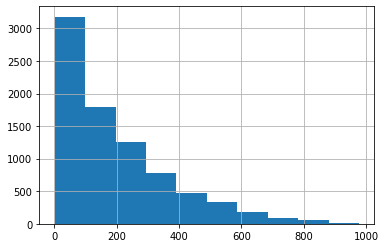

In [289]:
y.hist();